In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Practical Exam Datasets/K-Means & Hirarchical Clustering/cities_r2.csv')

In [3]:
df.shape

(493, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [5]:
df.isnull()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
489,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
491,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [7]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [8]:
xx=df[['effective_literacy_rate_total']]

In [9]:
sc=StandardScaler()
x=sc.fit_transform(xx)

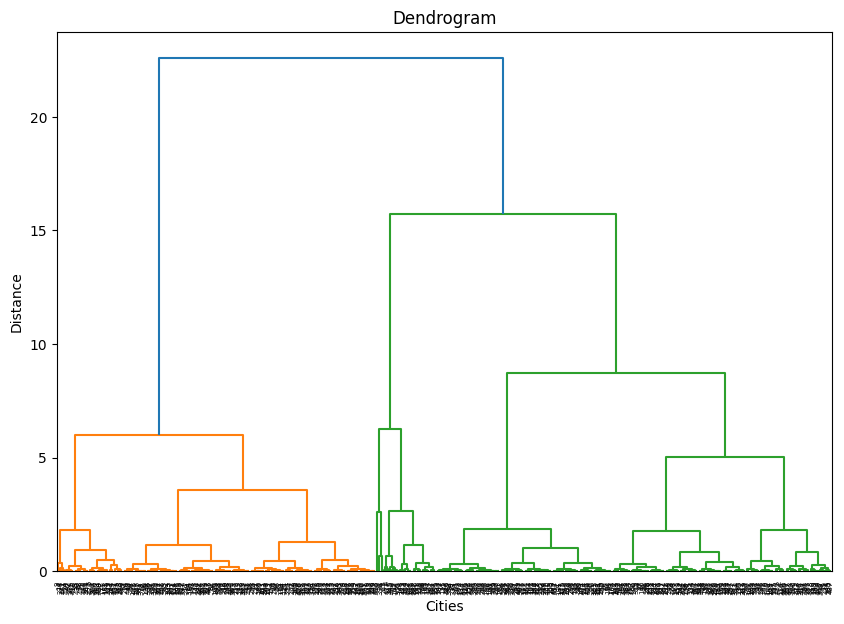

In [10]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
plt.title('Dendrogram')
plt.xlabel('Cities')
plt.ylabel('Distance')
dendro=sch.dendrogram(sch.linkage(x,method='ward'))
plt.show()

In [11]:
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
pred=model.fit_predict(x)

C:\Users\madha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [12]:
pred

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1,
       0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2,

In [13]:
df['Clusters']=pred

In [14]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,Clusters
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,0
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,1
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768,0
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036,0
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031,2


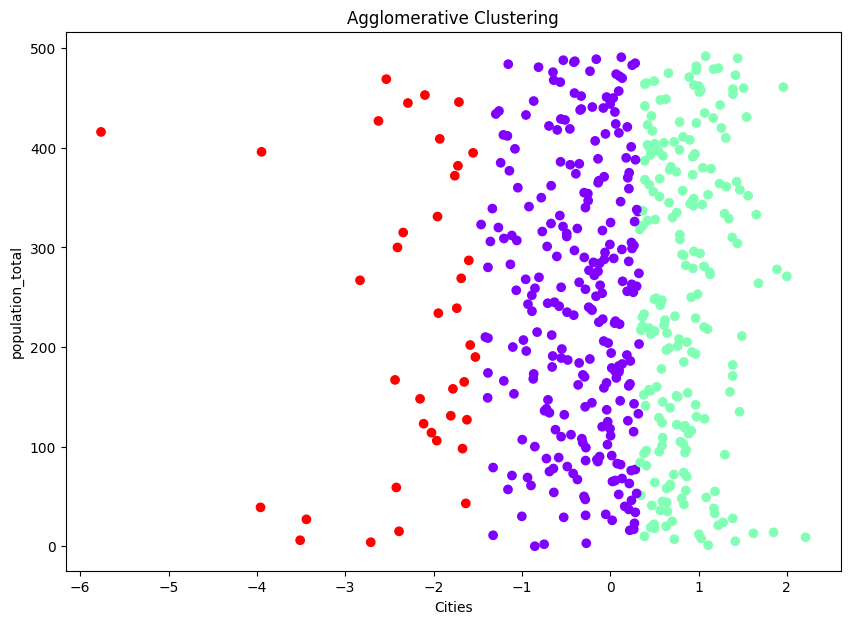

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(x,xx.index,c=df['Clusters'],cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Cities')
plt.ylabel('population_total')
plt.show()